In [30]:
from helpers import * 
from graph_checks import *

from four_complete import *
from four_complete_locations import *
from four_complete_buffer import *

import math

In [31]:
bottom_data = get_saved_graph_data("BOTTOM")
side_data = get_saved_graph_data()

graph_data = bottom_data


In [32]:
f = FourComplete(graph_data)
f.get_boundary_cyle()
f.generate_dividing_indices()
f.divide_boundary_cycle()
f.ensure_no_cips()
f.paths

ic| 'found cips - contains'
ic| 'found cips - contains reverse'
ic| 'found cips - contains reverse'
ic| 'found cips - contains reverse'


[[5, 4, 0, 8], [8, 3, 2, 7], [7, 6], [6, 5]]

In [33]:
b = BoundaryCycle(copy.deepcopy(graph_data))
locs = FourCompleteLocations(copy.deepcopy(graph_data), f.boundary, f.paths, b.boundary_line_string)

locs.run()

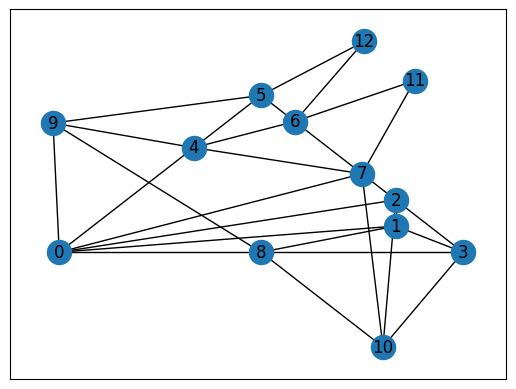

In [43]:
plot_planar(locs.G, locs.embed)

In [34]:
locs.corner_node_list

[CornerNode({'neighbour_indices': [5, 4, 0, 8], 'name': 'west', 'index': 9, 'location': (-1.0254596448773625, 0.3195781707919437), 'mean_location': None}),
 CornerNode({'neighbour_indices': [8, 3, 2, 7], 'name': 'south', 'index': 10, 'location': (0.3270786680771922, -0.8620689655172413), 'mean_location': None}),
 CornerNode({'neighbour_indices': [7, 6], 'name': 'east', 'index': 11, 'location': (0.4570016664553428, 0.5432085630070669), 'mean_location': None}),
 CornerNode({'neighbour_indices': [6, 5], 'name': 'north', 'index': 12, 'location': (0.25010511473120484, 0.7501051147312048), 'mean_location': None})]

In [35]:
coords = [c.location for c in locs.corner_node_list]
coords

[(-1.0254596448773625, 0.3195781707919437),
 (0.3270786680771922, -0.8620689655172413),
 (0.4570016664553428, 0.5432085630070669),
 (0.25010511473120484, 0.7501051147312048)]

In [36]:
west_pt = find_westernmost_point(coords)
ix = coords.index(west_pt)
ix

0

In [38]:
cw = clockwise_order(coords)
cw

[(0.3270786680771922, -0.8620689655172413),
 (0.4570016664553428, 0.5432085630070669),
 (0.25010511473120484, 0.7501051147312048),
 (-1.0254596448773625, 0.3195781707919437)]

In [39]:
order = [coords.index(i) for i in cw]
order

[1, 2, 3, 0]

In [40]:
card = ["north", "east", "south", "west", ]


In [41]:
for o, car in zip(order, card):
    ix = locs.corner_node_list[o].index
    ic(o, car, ix)
    locs.corner_node_list[o].name = car

ic| o: 1, car: 'north', ix: 10
ic| o: 2, car: 'east', ix: 11
ic| o: 3, car: 'south', ix: 12
ic| o: 0, car: 'west', ix: 9


In [42]:
locs.corner_node_list

[CornerNode({'neighbour_indices': [5, 4, 0, 8], 'name': 'west', 'index': 9, 'location': (-1.0254596448773625, 0.3195781707919437), 'mean_location': None}),
 CornerNode({'neighbour_indices': [8, 3, 2, 7], 'name': 'north', 'index': 10, 'location': (0.3270786680771922, -0.8620689655172413), 'mean_location': None}),
 CornerNode({'neighbour_indices': [7, 6], 'name': 'east', 'index': 11, 'location': (0.4570016664553428, 0.5432085630070669), 'mean_location': None}),
 CornerNode({'neighbour_indices': [6, 5], 'name': 'south', 'index': 12, 'location': (0.25010511473120484, 0.7501051147312048), 'mean_location': None})]